In [1]:
from diffusers import StableDiffusionUpscalePipeline
from diffusers.utils import load_image, make_image_grid
import torch


c:\Users\danic\AppData\Local\Programs\Python\Python312\Lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\danic\AppData\Local\Programs\Python\Python312\Lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")


model_index.json:   0%|          | 0.00/485 [00:00<?, ?B/s]

c:\Users\danic\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\danic\.cache\huggingface\hub\models--stabilityai--stable-diffusion-x4-upscaler. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/634 [00:00<?, ?B/s]

low_res_scheduler/scheduler_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/348 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/982 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/221M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.89G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

c:\Users\danic\AppData\Local\Programs\Python\Python312\Lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(


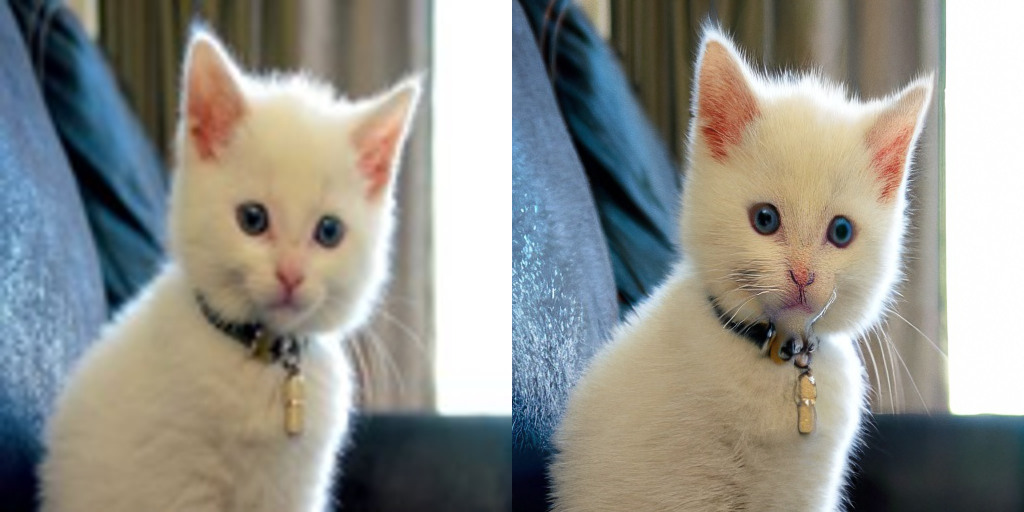

In [3]:
# let's download an  image
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
low_res_img = load_image(url)
low_res_img = low_res_img.resize((128, 128))
prompt = "a white cat"
upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
make_image_grid([low_res_img.resize((512, 512)), upscaled_image.resize((512, 512))], rows=1, cols=2)

  0%|          | 0/75 [00:00<?, ?it/s]

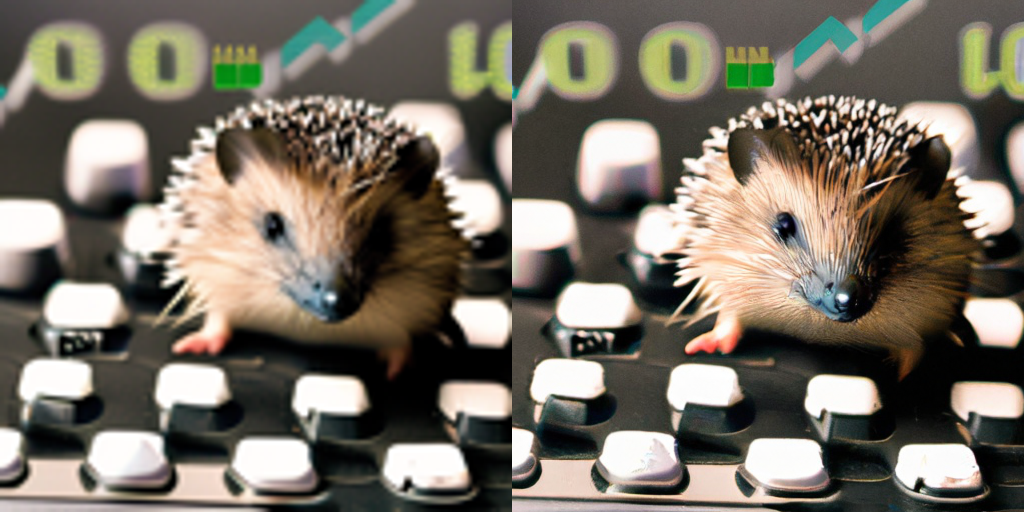

In [5]:
low_res_img = load_image("hedgehog.png")
low_res_img = low_res_img.resize((128, 128))
prompt = "a hedgehog"
upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
make_image_grid([low_res_img.resize((512, 512)), upscaled_image.resize((512, 512))], rows=1, cols=2)